<a href="https://colab.research.google.com/github/sandra-forro/stat-project/blob/main/project_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install shap
!pip install plotly
!pip install seaborn 
!pip install ipywidgets
!pip install matplotlib
!pip install statsmodels
!pip install patsy 
!pip install yellowbrick
!pip install sklearn
!pip install xgboost
!pip install imblearn
!pip install pandas


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in

In [ ]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import ipywidgets
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
from yellowbrick.datasets import load_concrete
from yellowbrick.classifier import PrecisionRecallCurve
from yellowbrick.model_selection.importances import FeatureImportances
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import roc_curve
from sklearn import metrics
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance
from sklearn.metrics import make_scorer, f1_score
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE, ADASYN, SMOTENC, BorderlineSMOTE, RandomOverSampler
from imblearn.under_sampling import ClusterCentroids
from sklearn.ensemble import AdaBoostClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import shap
from shap import TreeExplainer

In [ ]:
import numpy as np

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
url = 'https://raw.githubusercontent.com/sandra-forro/stat-project/main/data/predictive_maintenance.csv'
df = pd.read_csv(url)

# Visualizing

In [ ]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [ ]:
df['Failure Type'].value_counts()

No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64

In [ ]:
df.columns = df.columns.str.replace(" ", "_")
df.columns = df.columns.str.replace("[", "")
df.columns = df.columns.str.replace("]", "")

In [ ]:
df.describe()

,UDI,Air_temperature_K,Process_temperature_K,Rotational_speed_rpm,Torque_Nm,Tool_wear_min,Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [ ]:
all_failures = df[df['Failure_Type'] != 'No Failure'] # necessary for visualization without the No Failure Class

In [ ]:
variables = ['Air_temperature_K',
       'Process_temperature_K', 'Rotational_speed_rpm', 'Torque_Nm',
       'Tool_wear_min','Failure_Type']

### Class Seperation Check

In [ ]:
def plot3d(x, y, z, color, size):
    fig = px.scatter_3d(all_failures, x=x, y=y, z=z,
              color=color, size=size, size_max=25, opacity=0.65, height=700, 
                    title="Seperation of Classes")
    
    return fig

In [ ]:
!pip install ipywidgets==7.7.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
ipywidgets.interact(plot3d, x=variables[:-1], 
                    y = variables[:-1],
                    z = variables[:-1],
                    color=variables,
                   size = variables)

interactive(children=(Dropdown(description='x', options=('Air_temperature_K', 'Process_temperature_K', 'Rotati…

<function __main__.plot3d(x, y, z, color, size)>

### Failure by Type Category (L,M,H)

In [ ]:
def box(y):
    fig = px.box(df, x="Failure_Type", y=y, color="Type", points='suspectedoutliers', category_orders={'Type': ['L', 'M', 'H']}, width=1000,
                hover_data=['UDI'])
    fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
    return fig 

In [ ]:
ipywidgets.interact(box, y=variables[:-1])

interactive(children=(Dropdown(description='y', options=('Air_temperature_K', 'Process_temperature_K', 'Rotati…

<function __main__.box(y)>

In [ ]:
all_failures.groupby('Type')['Failure_Type'].count()

Type
H     24
L    243
M     81
Name: Failure_Type, dtype: int64

### Distribution, Correlation, Collinearity & Dummification

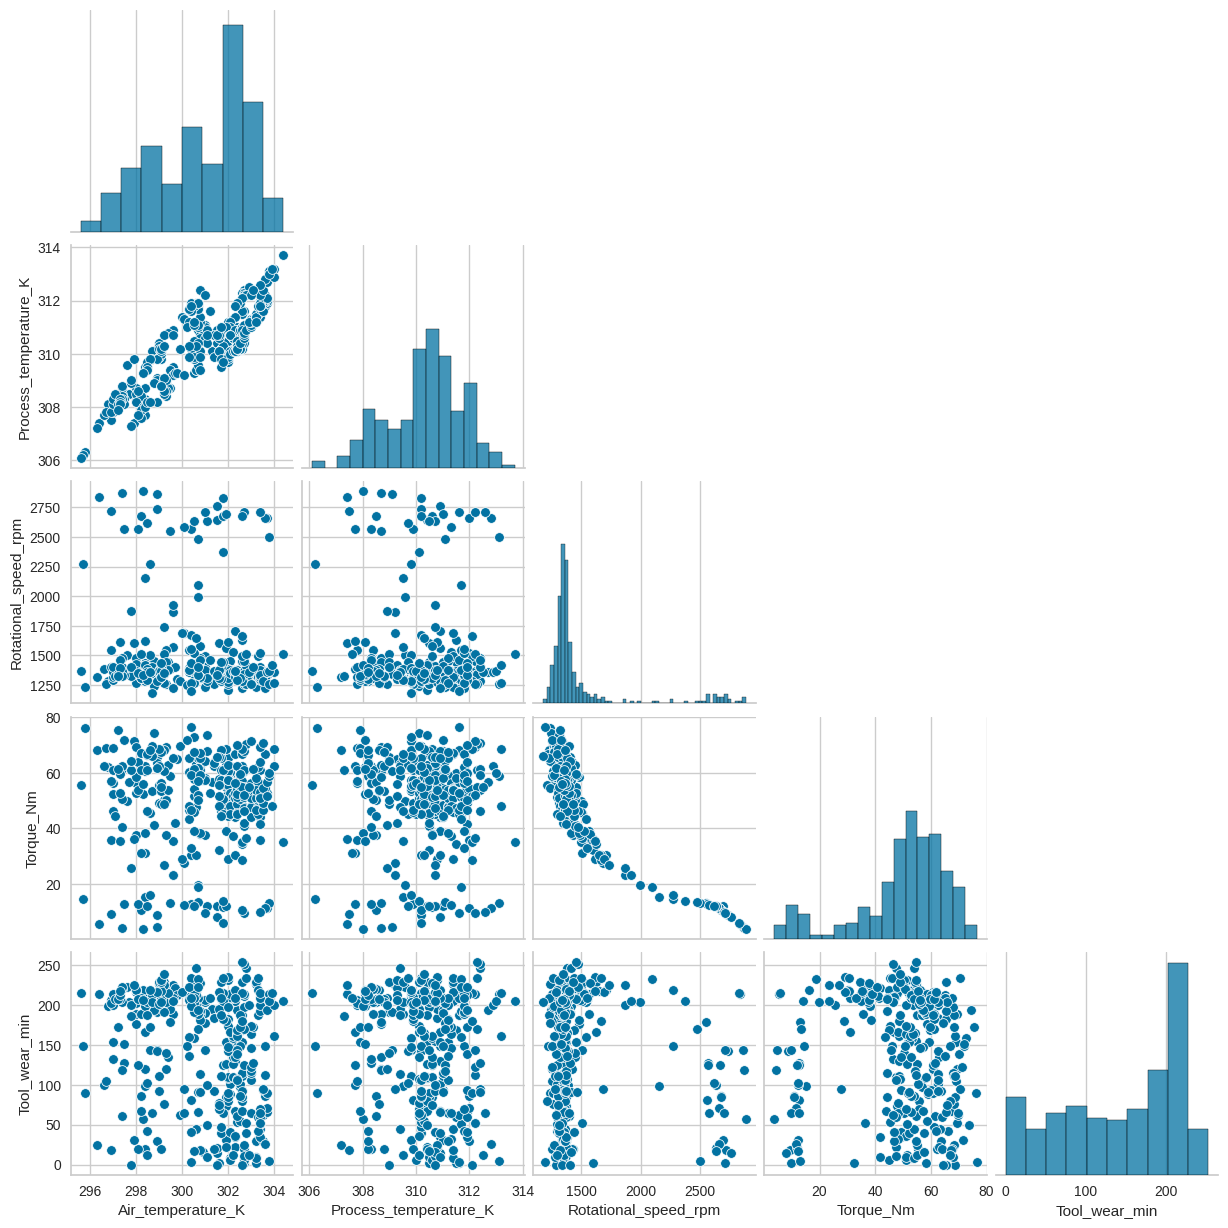

In [ ]:
sns.pairplot(all_failures[variables],corner=True)

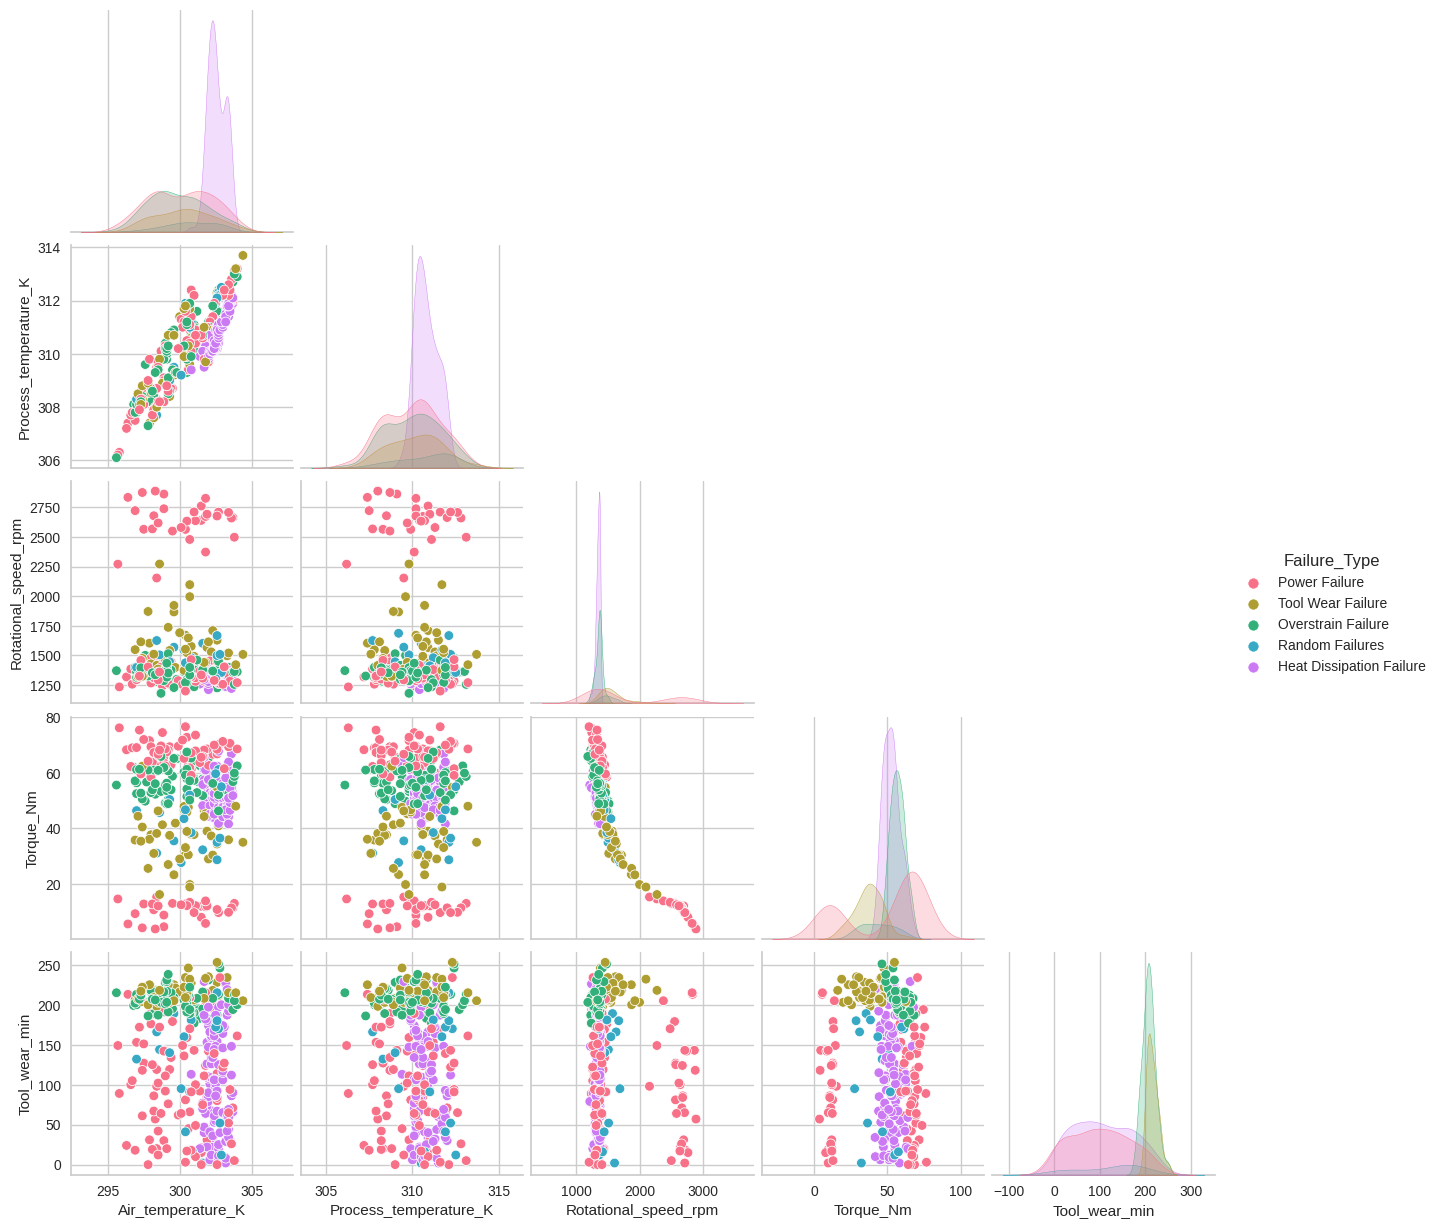

In [ ]:
sns.pairplot(all_failures[variables], hue="Failure_Type", palette='husl', corner=True)

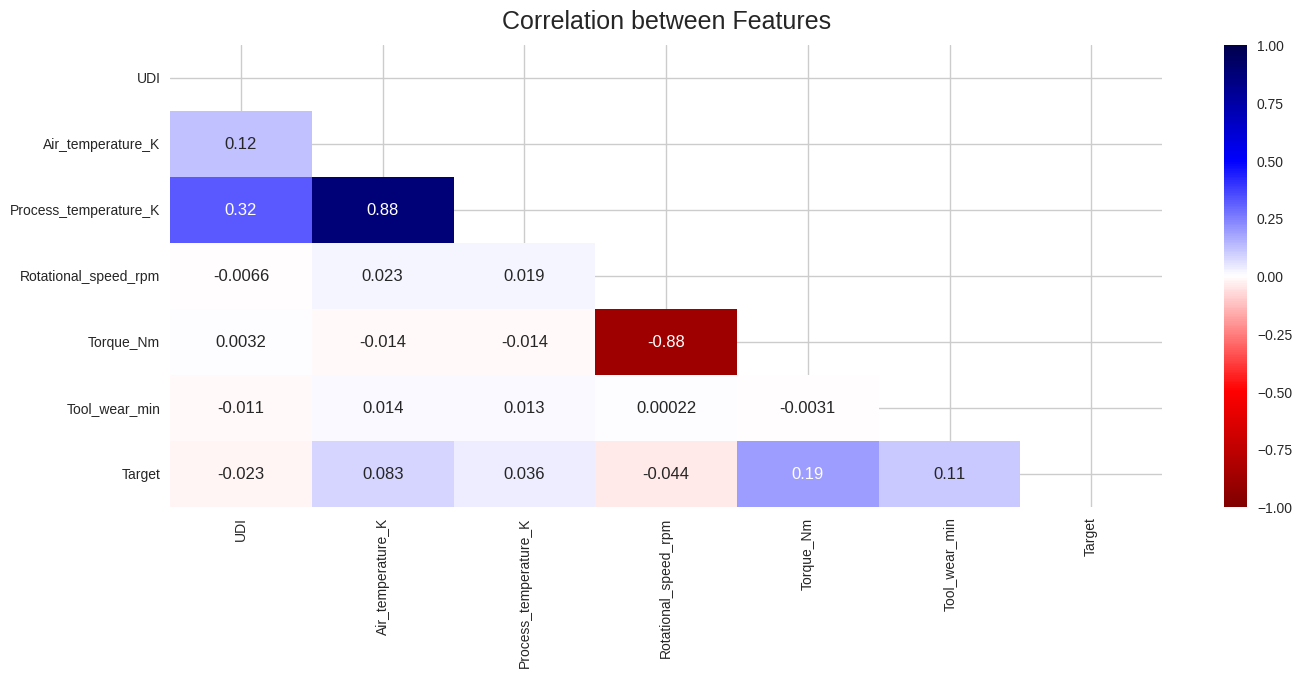

In [ ]:
plt.figure(figsize=(16, 6))
matrix = np.triu(df.corr())
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap=plt.get_cmap('seismic').reversed(), mask=matrix)
heatmap.set_title('Correlation between Features', fontdict={'fontsize':18}, pad=12);
# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
#plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

In [ ]:
LE = LabelEncoder()
df['code'] = LE.fit_transform(df['Failure_Type'])

In [ ]:
le_name_mapping = dict(zip(LE.classes_, LE.transform(LE.classes_)))
le_name_mapping

{'Heat Dissipation Failure': 0,
 'No Failure': 1,
 'Overstrain Failure': 2,
 'Power Failure': 3,
 'Random Failures': 4,
 'Tool Wear Failure': 5}

In [ ]:
le_name_mapping['Heat Dissipation Failure']=1
le_name_mapping['No Failure']=0

In [ ]:
le_name_mapping

{'Heat Dissipation Failure': 1,
 'No Failure': 0,
 'Overstrain Failure': 2,
 'Power Failure': 3,
 'Random Failures': 4,
 'Tool Wear Failure': 5}

In [ ]:
df['code'] = df['Failure_Type'].map(le_name_mapping)

In [ ]:
df.groupby('Failure_Type')['code'].min()

Failure_Type
Heat Dissipation Failure    1
No Failure                  0
Overstrain Failure          2
Power Failure               3
Random Failures             4
Tool Wear Failure           5
Name: code, dtype: int64

In [ ]:
dummies = pd.get_dummies(df.iloc[:,[2]])

In [ ]:
df_dummified = pd.concat([df, dummies], axis=1)

In [ ]:
features = df_dummified.iloc[:,[3,4,5,6,7, 12, 13, 13]]

In [ ]:
features = "+".join(features.columns)

# get y and X dataframes based on this regression:
y, X = dmatrices('Failure_Type ~' + features, df_dummified, return_type='dataframe')

In [ ]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [ ]:
vif

,VIF Factor,features
0,48953.289754,Intercept
1,4.304971,Air_temperature_K
2,4.302882,Process_temperature_K
3,4.270917,Rotational_speed_rpm
4,4.269660,Torque_Nm
5,1.000306,Tool_wear_min
6,2.794744,Type_L
7,2.794468,Type_M


# Train, test split

In [ ]:
train_data, test_data = train_test_split(df_dummified,test_size=0.4, random_state=0, stratify=df_dummified['code'])

In [ ]:
train_data.shape

(6000, 14)

In [ ]:
train_data.columns

Index(['UDI', 'Product_ID', 'Type', 'Air_temperature_K',
       'Process_temperature_K', 'Rotational_speed_rpm', 'Torque_Nm',
       'Tool_wear_min', 'Target', 'Failure_Type', 'code', 'Type_H', 'Type_L',
       'Type_M'],
      dtype='object')

In [ ]:
X_train = train_data.iloc[:,[3,4,5,6,7,11,12,13]]
y_train = train_data['code']

In [ ]:
X_test = test_data.iloc[:,[3,4,5,6,7,11,12,13]]
y_test = test_data['code']

# Multiclass Multinomial Logistic Regression Base Model

In [ ]:
logr = LogisticRegressionCV(verbose=2, cv=5, random_state=1, scoring='f1_macro')
logr_f1 = logr.fit(X_train, y_train)
logr_f1.score(X_train, y_train), logr_f1.score(X_test, y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   22.0s finished


(0.3970561404656337, 0.3954488633412401)

In [ ]:
p = logr_f1.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,p))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3861
           1       0.00      0.00      0.00        45
           2       0.68      0.42      0.52        31
           3       0.89      0.84      0.86        38
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00        18

    accuracy                           0.97      4000
   macro avg       0.43      0.38      0.40      4000
weighted avg       0.96      0.97      0.97      4000



Text(33.22222222222222, 0.5, 'Actual Value')

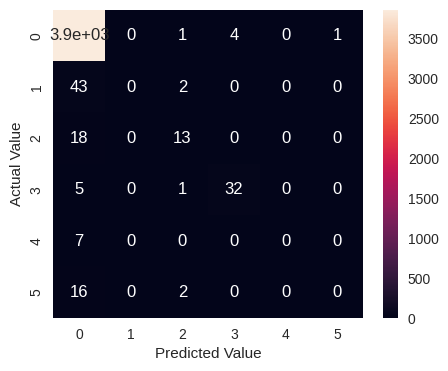

In [ ]:
cm = confusion_matrix(y_test, p)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')

# Multiclass Multinomial Logistic Regression Tuned Model


In [ ]:
model3 = LogisticRegressionCV(verbose=0,cv=5, random_state=1, max_iter=500,
                              class_weight={0: 0.2}, scoring='f1_macro', multi_class='multinomial')
model3 = model3.fit(X_train, y_train)
model3.score(X_train, y_train), model3.score(X_test, y_test)

(0.5585789973091454, 0.5539427047108993)

In [ ]:
p = model3.predict(X_test)

Text(33.22222222222222, 0.5, 'Actual Value')

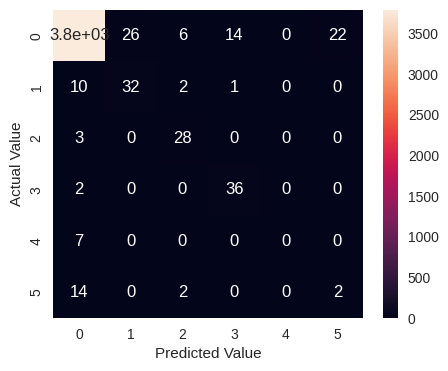

In [ ]:
cm = confusion_matrix(y_test, p)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')

In [ ]:
print(classification_report(y_test,p))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3861
           1       0.55      0.71      0.62        45
           2       0.74      0.90      0.81        31
           3       0.71      0.95      0.81        38
           4       0.00      0.00      0.00         7
           5       0.08      0.11      0.10        18

    accuracy                           0.97      4000
   macro avg       0.51      0.61      0.55      4000
weighted avg       0.98      0.97      0.97      4000



# One-Versus-Rest (OVR) Multinomial Logistic Regression Base Model

In [ ]:
model_ovr = LogisticRegressionCV(verbose=0,cv=5, random_state=1,scoring='f1_macro', multi_class='ovr')
model_ovr = model_ovr.fit(X_train, y_train)
model_ovr.score(X_train, y_train), model_ovr.score(X_test, y_test)

(0.4172276662835919, 0.4173005037392283)

In [ ]:
p = model_ovr.predict(X_test)

Text(33.22222222222222, 0.5, 'Actual Value')

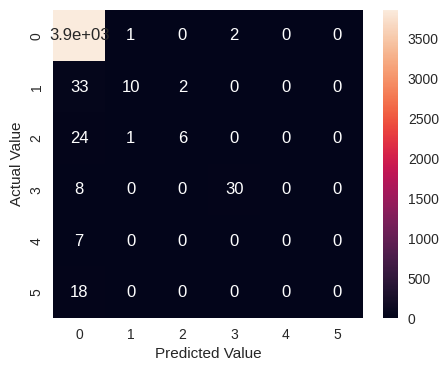

In [ ]:
cm = confusion_matrix(y_test, p)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')

In [ ]:
print(classification_report(y_test,p))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3861
           1       0.83      0.22      0.35        45
           2       0.75      0.19      0.31        31
           3       0.94      0.79      0.86        38
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00        18

    accuracy                           0.98      4000
   macro avg       0.58      0.37      0.42      4000
weighted avg       0.97      0.98      0.97      4000



# One-Versus-Rest (OVR) Multinomial Logistic Regression Tuned Model

In [ ]:
model_ovr = LogisticRegressionCV(verbose=0,cv=5, random_state=1, max_iter=200,
                              class_weight={0: 0.2}, scoring='f1_macro', multi_class='ovr')
model_ovr = model_ovr.fit(X_train, y_train)
model_ovr.score(X_train, y_train), model_ovr.score(X_test, y_test)

(0.5380480884295392, 0.5170484349238377)

In [ ]:
p = model_ovr.predict(X_test)

Text(33.22222222222222, 0.5, 'Actual Value')

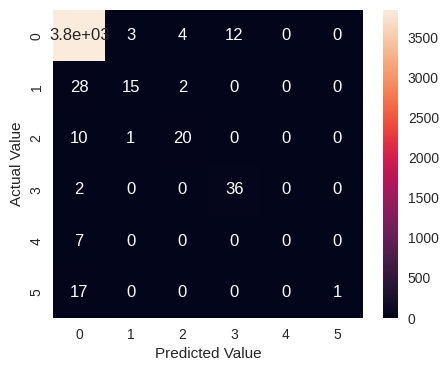

In [ ]:
cm = confusion_matrix(y_test, p)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')

In [ ]:
print(classification_report(y_test,p))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3861
           1       0.79      0.33      0.47        45
           2       0.77      0.65      0.70        31
           3       0.75      0.95      0.84        38
           4       0.00      0.00      0.00         7
           5       1.00      0.06      0.11        18

    accuracy                           0.98      4000
   macro avg       0.72      0.50      0.52      4000
weighted avg       0.98      0.98      0.97      4000



In [ ]:
# using model 3
compare = pd.DataFrame({'Predicted': p.transpose(),'Actual': y_test}, columns=['Predicted', 'Actual'])


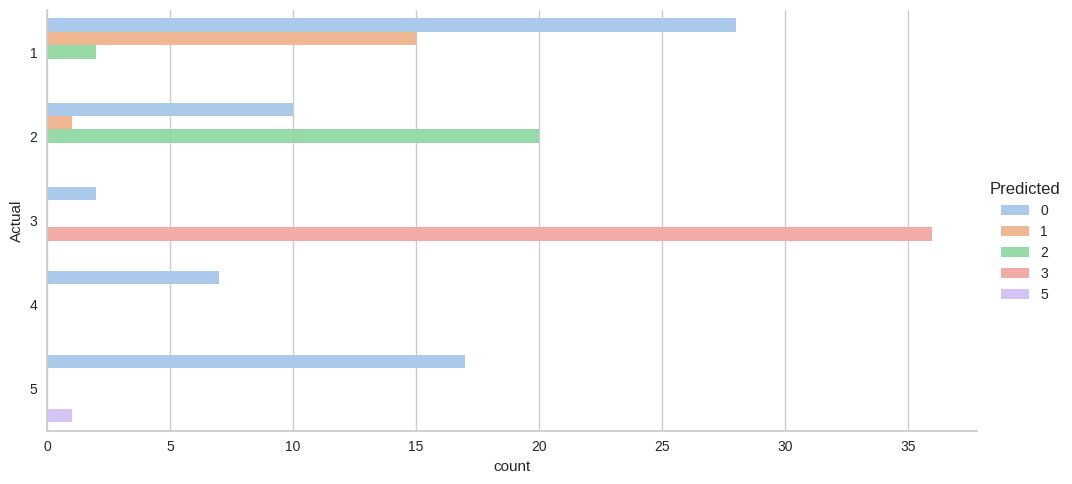

In [ ]:
sns.catplot(
    data=compare[compare['Actual']!=0], y="Actual", hue="Predicted", kind="count",palette="pastel", aspect=2)


In [ ]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

In [ ]:
for i in range (0,6): 
    print(f"Specificity for class {i}: {TNR[i]}")
    print("\n")

Specificity for class 0: 0.539568345323741


Specificity for class 1: 0.9989886219974715


Specificity for class 2: 0.99848828420257


Specificity for class 3: 0.9969712266532055


Specificity for class 4: 1.0


Specificity for class 5: 1.0




# Threshold Setting

In [ ]:
for i in range (0,6):
    fpr, tpr, thresholds = metrics.roc_curve(y_test, p, pos_label=[i], drop_intermediate=True)
    print(F"{i} class tpr: {tpr}")
    print(F"{i} class fpr: {fpr}")
    print(F"{i} class thresholds: {fpr-tpr}")

0 class tpr: [0.       0.       0.003108 0.004144 0.004921 1.      ]
0 class fpr: [0.         0.00719424 0.26618705 0.42446043 0.53956835 1.        ]
0 class thresholds: [0.         0.00719424 0.26307905 0.42031643 0.53464734 0.        ]
1 class tpr: [0.         0.         0.         0.04444444 0.37777778 1.        ]
1 class fpr: [0.00000000e+00 2.52844501e-04 1.23893805e-02 1.84576485e-02
 1.94690265e-02 1.00000000e+00]
1 class thresholds: [ 0.00000000e+00  2.52844501e-04  1.23893805e-02 -2.59867959e-02
 -3.58308751e-01  0.00000000e+00]
2 class tpr: [0.         0.         0.         0.64516129 0.67741935 1.        ]
2 class fpr: [0.00000000e+00 2.51952633e-04 1.23456790e-02 1.38573948e-02
 1.83925422e-02 1.00000000e+00]
2 class thresholds: [ 0.00000000e+00  2.51952633e-04  1.23456790e-02 -6.31303896e-01
 -6.59026813e-01  0.00000000e+00]
3 class tpr: [0.         0.         0.94736842 0.94736842 0.94736842 1.        ]
3 class fpr: [0.00000000e+00 2.52397779e-04 3.28117113e-03 9.84351338

In [ ]:
pred_proba_df = pd.DataFrame(model3.predict_proba(X_test))

In [ ]:
pred_proba_df

,0,1,2,3,4,5
0,0.991471,1.011790e-03,1.888046e-12,7.080210e-08,0.007517,3.455125e-09
1,0.989393,1.059837e-12,4.794248e-08,4.606213e-06,0.002687,7.914929e-03
2,0.980681,1.011282e-02,7.164593e-13,2.525672e-08,0.009206,2.275188e-09
3,0.992773,1.982472e-05,3.209487e-09,9.201943e-09,0.007151,5.640436e-05
4,0.997733,4.494372e-10,9.040263e-13,1.757867e-08,0.002267,3.157828e-08
...,...,...,...,...,...,...
3995,0.858380,8.164350e-06,9.367103e-05,2.438953e-07,0.006993,1.345250e-01
3996,0.991106,2.882959e-05,2.641287e-09,2.201420e-06,0.008862,3.753332e-07
3997,0.990426,3.514284e-04,7.394851e-09,1.112720e-05,0.009211,1.109717e-08
3998,0.988889,1.137592e-04,1.645604e-06,1.853675e-05,0.010958,1.946857e-05


In [ ]:
pred_proba_df['0'] = pred_proba_df.iloc[:,[0]].applymap(lambda x: 1 if x>0.73 else 0)

In [ ]:
pred_proba_df['1'] = pred_proba_df.iloc[:,[1]].applymap(lambda x: 1 if x>0.74 else 0)

In [ ]:
pred_proba_df['2'] = pred_proba_df.iloc[:,[2]].applymap(lambda x: 1 if x>0.86 else 0)

In [ ]:
pred_proba_df['3'] = pred_proba_df.iloc[:,[3]].applymap(lambda x: 1 if x>0.9 else 0)

In [ ]:
pred_proba_df['4'] = pred_proba_df.iloc[:,[4]].applymap(lambda x: 1 if x>0.1 else 0)

In [ ]:
pred_proba_df['5'] = pred_proba_df.iloc[:,[5]].applymap(lambda x: 1 if x>0.29 else 0)

In [ ]:
pred_proba_df.iloc[:,[6,7,8,9,10,11]].value_counts()

0  1  2  3  4  5
1  0  0  0  0  0    3669
0  0  0  0  0  0     202
               1      71
         1  0  0      32
   1  0  0  0  0      17
   0  1  0  0  0       9
dtype: int64

In [ ]:
pred_proba_df['sum'] = pred_proba_df.iloc[:,[6,7,8,9,10,11]].sum(axis=1)

In [ ]:
pred_proba_df

,0,1,2,3,4,5,0,1,2,3,4,5,sum
0,0.991471,1.011790e-03,1.888046e-12,7.080210e-08,0.007517,3.455125e-09,1,0,0,0,0,0,1
1,0.989393,1.059837e-12,4.794248e-08,4.606213e-06,0.002687,7.914929e-03,1,0,0,0,0,0,1
2,0.980681,1.011282e-02,7.164593e-13,2.525672e-08,0.009206,2.275188e-09,1,0,0,0,0,0,1
3,0.992773,1.982472e-05,3.209487e-09,9.201943e-09,0.007151,5.640436e-05,1,0,0,0,0,0,1
4,0.997733,4.494372e-10,9.040263e-13,1.757867e-08,0.002267,3.157828e-08,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.858380,8.164350e-06,9.367103e-05,2.438953e-07,0.006993,1.345250e-01,1,0,0,0,0,0,1
3996,0.991106,2.882959e-05,2.641287e-09,2.201420e-06,0.008862,3.753332e-07,1,0,0,0,0,0,1
3997,0.990426,3.514284e-04,7.394851e-09,1.112720e-05,0.009211,1.109717e-08,1,0,0,0,0,0,1
3998,0.988889,1.137592e-04,1.645604e-06,1.853675e-05,0.010958,1.946857e-05,1,0,0,0,0,0,1


In [ ]:
pred_proba_df['decision'] = np.where(pred_proba_df['sum']==1, pred_proba_df[['1','2','3','4','5']].idxmax(axis=1), 'fill')

In [ ]:
pred_proba_df['decision'] = np.where(pred_proba_df['sum']<1, 'no_pred', pred_proba_df.iloc[:,[0,1,2,3,4,5]].idxmax(axis=1))



In [ ]:
pred_proba_df['decision'].value_counts()

0          3715
no_pred     202
3            32
5            24
1            17
2            10
Name: decision, dtype: int64

In [ ]:
p_removed = pred_proba_df[pred_proba_df['decision']!='no_pred']['decision']

In [ ]:
p_removed.value_counts()

0    3715
3      32
5      24
1      17
2      10
Name: decision, dtype: int64

In [ ]:
y_test_removed = y_test.copy()

In [ ]:
ind = pred_proba_df.loc[pred_proba_df.decision == 'no_pred'].index

In [ ]:
for i in ind:
    y_test_removed.drop(y_test.index[i], inplace=True)

In [ ]:
y_test_removed

5235    0
9404    0
4218    0
2984    0
8222    0
       ..
8252    0
6758    0
2710    0
7363    0
1733    0
Name: code, Length: 3798, dtype: int64

In [ ]:
p_removed = pd.to_numeric(y_test_removed) # was string because of no_pred label earlier

Text(33.22222222222222, 0.5, 'Actual Value')

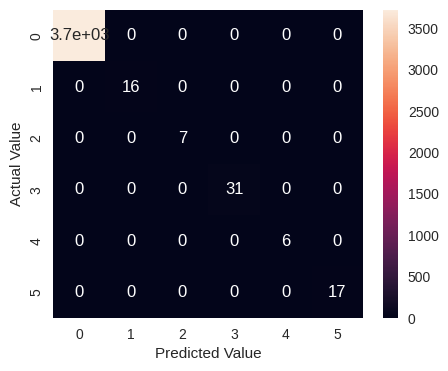

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(p_removed, y_test_removed)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')

# Feature Engineering

In [ ]:
def add_interactions(df):
    df['air_process_dif'] = df['Air_temperature_K']-df['Process_temperature_K']
    df['torque_x_rotational'] = df['Torque_Nm']*df['Rotational_speed_rpm']
    df['torque_x_Tool_wear_min'] = df['Torque_Nm']*df['Tool_wear_min']
    
    return df

In [ ]:
X_train_interaction = add_interactions(X_train.copy())

In [ ]:
X_test_interaction = add_interactions(X_test.copy())

## Multiclass Multinomial Logistic Regression Base Model With Interaction Terms

In [ ]:
model3 = LogisticRegressionCV(verbose=0,cv=5, random_state=1,
                              scoring='f1_macro')
model3 = model3.fit(X_train_interaction, y_train)
model3.score(X_train_interaction, y_train), model3.score(X_test_interaction, y_test)

(0.2500306810773422, 0.2440940596164477)

In [ ]:
p= model3.predict(X_test_interaction)

In [ ]:
print(classification_report(y_test,p))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      3861
           1       0.00      0.00      0.00        45
           2       0.63      0.39      0.48        31
           3       0.00      0.00      0.00        38
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00        18

    accuracy                           0.97      4000
   macro avg       0.27      0.23      0.24      4000
weighted avg       0.94      0.97      0.95      4000



# Outlier Removal

In [ ]:
outliers_removed = pd.concat([X_train, y_train], axis=1)

In [ ]:
outliers_removed_test = pd.concat([X_test, y_test], axis=1)

In [ ]:
outliers_list_index = [4153, 9576, 3829, 4078, 6091, 5400, 5401, 8846, 5309, 2270]

In [ ]:
def filter_m(df): 
    ind = df[(df['Rotational_speed_rpm']>=1895)&(df['Type_M']==1)&
                 (df['code']==0)].index
    
    return ind

In [ ]:
def filter_l(df): 
    ind = df[(df['Rotational_speed_rpm']>=1896)&(df['Type_L']==1)&
                     (df['code']==0)].index

    return ind

In [ ]:
def filter_h(df): 
    ind = df[(df['Rotational_speed_rpm']>=1906)&(df['Type_H']==1)&
                     (df['code']==0)].index

    return ind

In [ ]:
for i in filter_h(outliers_removed):
    outliers_removed.drop(i, inplace=True)


In [ ]:
for i in filter_l(outliers_removed):
    outliers_removed.drop(i, inplace=True)


In [ ]:
for i in filter_m(outliers_removed):
    outliers_removed.drop(i, inplace=True)


In [ ]:
for i in outliers_list_index:
    if i in outliers_removed:
        outliers_removed.drop(i, inplace=True)
        
    if i in outliers_removed_test:
        outliers_removed_test.drop(i, inplace=True)


In [ ]:
for i in filter_h(outliers_removed_test):
    outliers_removed_test.drop(i, inplace=True)


In [ ]:
for i in filter_l(outliers_removed_test):
    outliers_removed_test.drop(i, inplace=True)


In [ ]:
for i in filter_m(outliers_removed_test):
    outliers_removed_test.drop(i, inplace=True)


In [ ]:
outliers_removed.shape #0.04% removed

(5771, 9)

In [ ]:
outliers_removed_test.shape # 0.04% removed

(3845, 9)

In [ ]:
outliers_removed.columns

Index(['Air_temperature_K', 'Process_temperature_K', 'Rotational_speed_rpm',
       'Torque_Nm', 'Tool_wear_min', 'Type_H', 'Type_L', 'Type_M', 'code'],
      dtype='object')

In [ ]:
X_train_removed = outliers_removed.iloc[:,[0,1,2,3,4,5,6,7]]
y_train_removed = outliers_removed.iloc[:,[8]]

In [ ]:
X_test_removed = outliers_removed_test.iloc[:,[0,1,2,3,4,5,6,7]]
y_test_removed = outliers_removed_test.iloc[:,[8]]

## Multiclass Multinomial Logistic Regression Base Model With Outlier Treatment

In [ ]:
model3 = LogisticRegressionCV(verbose=0,cv=5, random_state=1,
                              scoring='f1_macro')
model3 = model3.fit(X_train_removed, y_train_removed)
model3.score(X_train_removed, y_train_removed), model3.score(X_test_removed, y_test_removed)

(0.4157701253804387, 0.3896455878516087)

In [ ]:
p = model3.predict(X_test_removed)

In [ ]:
print(classification_report(y_test_removed, p))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3706
           1       0.00      0.00      0.00        45
           2       0.67      0.39      0.49        31
           3       0.83      0.89      0.86        38
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00        18

    accuracy                           0.97      3845
   macro avg       0.41      0.38      0.39      3845
weighted avg       0.96      0.97      0.96      3845



##  Multiclass Multinomial Logistic Regression Tuned Model With Outlier Treatment

In [ ]:
model3 = LogisticRegressionCV(verbose=0,cv=5, random_state=1, max_iter=500,
                              class_weight={0: 0.2}, scoring='f1_macro', multi_class='multinomial')
model3 = model3.fit(X_train_removed, y_train_removed)
model3.score(X_train_removed, y_train_removed), model3.score(X_test_removed, y_test_removed)

(0.5844039993172773, 0.595326744291001)

In [ ]:
p = model3.predict(X_test_removed)

In [ ]:
print(classification_report(y_test_removed,p))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3706
           1       0.61      0.73      0.67        45
           2       0.80      0.90      0.85        31
           3       0.74      0.97      0.84        38
           4       0.00      0.00      0.00         7
           5       0.19      0.28      0.23        18

    accuracy                           0.98      3845
   macro avg       0.56      0.65      0.60      3845
weighted avg       0.98      0.98      0.98      3845



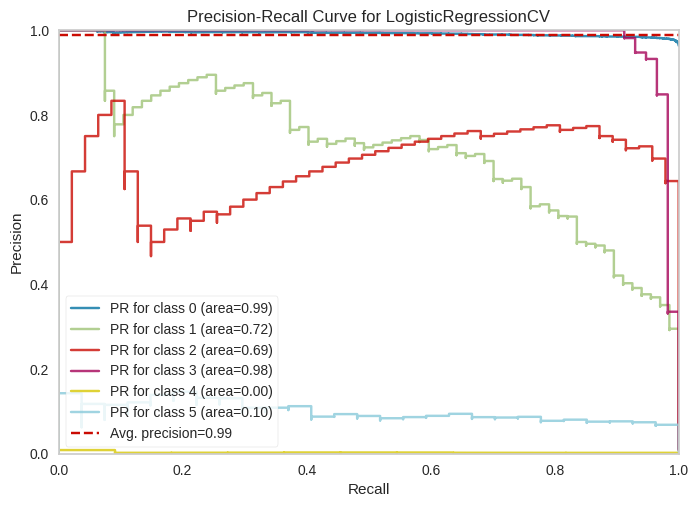

<Axes: title={'center': 'Precision-Recall Curve for LogisticRegressionCV'}, xlabel='Recall', ylabel='Precision'>

In [ ]:
viz = PrecisionRecallCurve(model3, per_class=True)
viz.fit(X_train_removed, y_train_removed)
viz.score(X_train_removed, y_train_removed)
viz.show()

Text(33.22222222222222, 0.5, 'Actual Value')

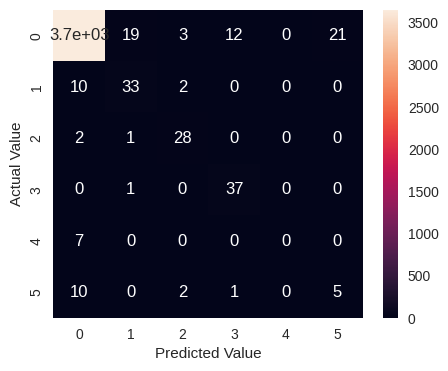

In [ ]:
cm = confusion_matrix(y_test_removed,p)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')

## Adding Interactions & Transforming

In [ ]:
X_removedO_interaction = add_interactions(X_train_removed.copy())
X_removedO_test_interaction = add_interactions(X_test_removed.copy())

In [ ]:
X_removedO_interaction.columns

Index(['Air_temperature_K', 'Process_temperature_K', 'Rotational_speed_rpm',
       'Torque_Nm', 'Tool_wear_min', 'Type_H', 'Type_L', 'Type_M',
       'air_process_dif', 'torque_x_rotational', 'torque_x_Tool_wear_min'],
      dtype='object')

In [ ]:
transformed = X_removedO_interaction.copy()
transformer = RobustScaler().fit(transformed.iloc[:,[0,1,2,3,4,8,9,10]])
transformed.iloc[:,[0,1,2,3,4,8,9,10]] = transformer.transform(transformed.iloc[:,[0,1,2,3,4,8,9,10]])

In [ ]:
transformed_test = X_removedO_test_interaction.copy()
transformed_test.iloc[:,[0,1,2,3,4,8,9,10]] = transformer.transform(transformed_test.iloc[:,[0,1,2,3,4,8,9,10]])

## Multiclass Multinomial Logistic Regression Base Model with Outlier Treatment, Feature Scaling and Monotone Transformations

In [ ]:
model3 = LogisticRegressionCV(verbose=0,cv=5, random_state=1,
                              scoring='f1_macro')
model3 = model3.fit(transformed, y_train_removed)
model3.score(transformed, y_train_removed), model3.score(transformed_test, y_test_removed)

(0.6118147546440781, 0.5412731263340286)

In [ ]:
p = model3.predict(transformed_test)
print(classification_report(y_test_removed, p))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3706
           1       0.89      0.56      0.68        45
           2       0.78      0.58      0.67        31
           3       0.83      1.00      0.90        38
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00        18

    accuracy                           0.98      3845
   macro avg       0.58      0.52      0.54      3845
weighted avg       0.98      0.98      0.98      3845



## Multiclass Multinomial Logistic Regression Tuned Model with Outlier Treatment, Feature Scaling and Monotone Transformations

In [ ]:
model3 = LogisticRegressionCV(verbose=0,cv=5, random_state=1, max_iter=500,
                              class_weight={0: 0.4}, scoring='f1_macro', multi_class='multinomial')
model3 = model3.fit(transformed, y_train_removed)
model3.score(transformed, y_train_removed), model3.score(transformed_test, y_test_removed)

(0.6109770209925669, 0.5981589473206622)

In [ ]:
p = model3.predict(transformed_test)
print(classification_report(y_test_removed,p))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3706
           1       0.69      0.73      0.71        45
           2       0.80      0.77      0.79        31
           3       0.86      1.00      0.93        38
           4       0.00      0.00      0.00         7
           5       0.40      0.11      0.17        18

    accuracy                           0.98      3845
   macro avg       0.62      0.60      0.60      3845
weighted avg       0.98      0.98      0.98      3845



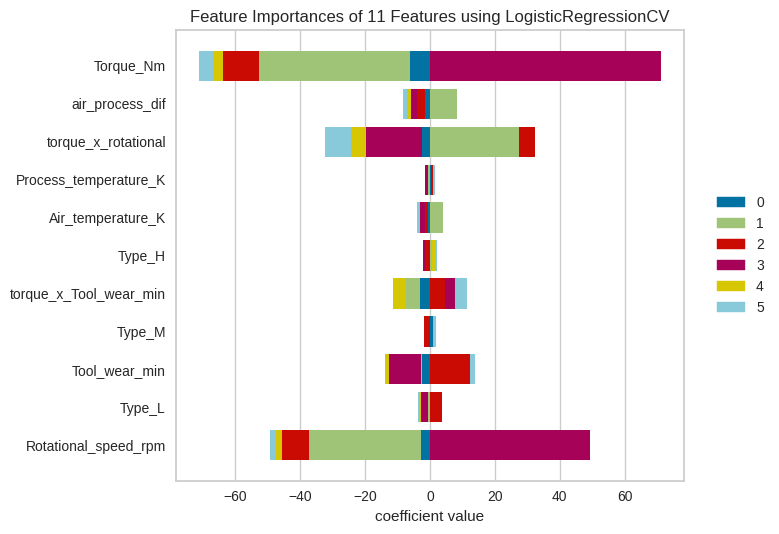

<Axes: title={'center': 'Feature Importances of 11 Features using LogisticRegressionCV'}, xlabel='coefficient value'>

In [ ]:
viz = FeatureImportances(model3, relative=False, stack=True)
viz.fit(transformed, y_train_removed)
viz.show()

# One-Versus-Rest (OVR) Multinomial Logistic Regression Base Model with Outlier Treatment, Feature Scaling and Monotone Transformations

In [ ]:
model_ovr = LogisticRegressionCV(verbose=0,cv=5, random_state=1,scoring='f1_macro', multi_class='ovr')
model_ovr = model_ovr.fit(transformed, y_train_removed)
model_ovr.score(transformed, y_train_removed), model_ovr.score(transformed_test, y_test_removed)

(0.5069866959727812, 0.445622488404092)

In [ ]:
p=model_ovr.predict(transformed_test)
print(classification_report(y_test_removed,p))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3706
           1       0.92      0.24      0.39        45
           2       0.78      0.23      0.35        31
           3       0.93      0.97      0.95        38
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00        18

    accuracy                           0.98      3845
   macro avg       0.60      0.41      0.45      3845
weighted avg       0.97      0.98      0.97      3845



# One-Versus-Rest (OVR) Multinomial Logistic Regression Tuned Model with Outlier Treatment, Feature Scaling and Monotone Transformations

In [ ]:
model_ovr = LogisticRegressionCV(verbose=0,cv=5, random_state=1, max_iter=200,
                              class_weight={0: 0.1}, scoring='f1_macro', multi_class='ovr')
model_ovr = model_ovr.fit(transformed, y_train_removed)
model_ovr.score(transformed, y_train_removed), model_ovr.score(transformed_test, y_test_removed)

(0.5953097731013932, 0.5787610449849538)

In [ ]:
p=model_ovr.predict(transformed_test)
print(classification_report(y_test_removed,p))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3706
           1       0.49      0.80      0.61        45
           2       0.71      0.81      0.76        31
           3       0.81      1.00      0.89        38
           4       0.00      0.00      0.00         7
           5       0.24      0.22      0.23        18

    accuracy                           0.97      3845
   macro avg       0.54      0.64      0.58      3845
weighted avg       0.98      0.97      0.97      3845



# Boosting
### Note that I unfortunately forgot to set seed for some of the following examples. 

# XGBoost Base Model

In [ ]:
xgb_cl = xgb.XGBClassifier(eval_metric='aucpr')

In [ ]:
xgb_cl.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
p = xgb_cl.predict(X_test)
print(classification_report(y_test,p))
p_fit = xgb_cl.predict(X_train)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3861
           1       0.95      0.82      0.88        45
           2       0.76      0.52      0.62        31
           3       0.84      0.84      0.84        38
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00        18

    accuracy                           0.98      4000
   macro avg       0.59      0.53      0.56      4000
weighted avg       0.98      0.98      0.98      4000



In [ ]:
print(f"Test: {f1_score(y_test,p, average='macro')}")
print(f"Train: {f1_score(y_train,p_fit, average='macro')}")

Test: 0.5550967369381977
Train: 1.0


Text(33.22222222222222, 0.5, 'Actual Value')

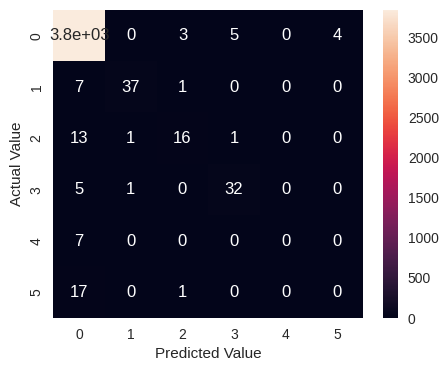

In [ ]:
cm = confusion_matrix(y_test, p)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')

# XGBoost Tuned Model

In [ ]:
param_grid = {
    "disable_default_eval_metric":[True],
    "learning_rate": [0, 0.01, 0.05, 0.1],
    "gamma": [1,5,10],
    "subsample": [1],
    "interaction_constraints": [[['Air_temperature_K', 'Process_temperature_K'], ['Rotational_speed_rpm', 'Torque_Nm'],
                                ['Torque_Nm','Tool_wear_min']]]
}

xgb_cl2 = xgb.XGBClassifier(objective="multi:softmax")
grid_cv =GridSearchCV(xgb_cl2, param_grid, n_jobs=-1, cv=3, scoring='f1_macro')
_ = grid_cv.fit(X_train, y_train)
print(f"best score: {grid_cv.best_score_}")
print(f"best parameters: {grid_cv.best_params_}")

best score: 0.4983973193754439
best parameters: {'disable_default_eval_metric': True, 'gamma': 1, 'interaction_constraints': [['Air_temperature_K', 'Process_temperature_K'], ['Rotational_speed_rpm', 'Torque_Nm'], ['Torque_Nm', 'Tool_wear_min']], 'learning_rate': 0.1, 'subsample': 1}


In [ ]:
final_cl = xgb.XGBClassifier(**grid_cv.best_params_, objective="multi:softmax", num_class=6)

In [ ]:
model_final = final_cl.fit(X_train, y_train)

In [ ]:
p = model_final.predict(X_test)

In [ ]:
print(classification_report(y_test,p))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3861
           1       1.00      0.78      0.88        45
           2       0.74      0.55      0.63        31
           3       0.92      0.89      0.91        38
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00        18

    accuracy                           0.99      4000
   macro avg       0.61      0.54      0.57      4000
weighted avg       0.98      0.99      0.98      4000



In [ ]:
print(f"Test: {f1_score(y_test,p, average='macro')}")

Test: 0.5673904849565851


## XGBoost With Outlier Treatment, Feature Scaling, and Monotone Transformations

In [ ]:
model = xgb_cl.fit(transformed, y_train_removed)

In [ ]:
p = model.predict(transformed_test)
p_fit = model.predict(transformed)
f1_score(y_train_removed, p_fit, average='macro')

1.0

In [ ]:
print(classification_report(y_test_removed, p))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3706
           1       0.98      0.89      0.93        45
           2       0.93      0.84      0.88        31
           3       0.95      1.00      0.97        38
           4       1.00      0.14      0.25         7
           5       0.00      0.00      0.00        18

    accuracy                           0.99      3845
   macro avg       0.81      0.64      0.67      3845
weighted avg       0.99      0.99      0.99      3845



Text(33.22222222222222, 0.5, 'Actual Value')

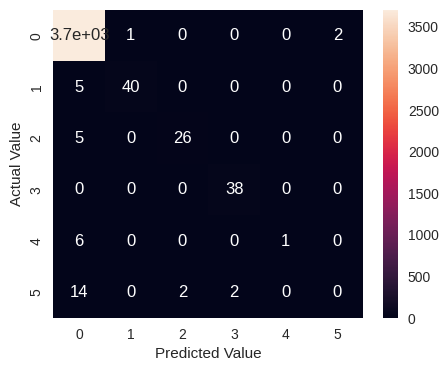

In [ ]:
cm = confusion_matrix(y_test_removed, p)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')

In [ ]:
param_grid = {
    "disable_default_eval_metric":[True],
    "learning_rate": [0, 0.01, 0.05, 0.1],
    "gamma": [1,5,10],
    "subsample": [1],
    "interaction_constraints": [[['Air_temperature_K', 'Process_temperature_K'], ['Rotational_speed_rpm', 'Torque_Nm'],
                                ['Torque_Nm','Tool_wear_min']]]
}

xgb_cl2 = xgb.XGBClassifier(objective="multi:softmax")
grid_cv =GridSearchCV(xgb_cl2, param_grid, n_jobs=-1, cv=3, scoring='f1_macro')
_ = grid_cv.fit(transformed, y_train_removed)
print(f"best score: {grid_cv.best_score_}")
print(f"best parameters: {grid_cv.best_params_}")

best score: 0.6134237687165539
best parameters: {'disable_default_eval_metric': True, 'gamma': 5, 'interaction_constraints': [['Air_temperature_K', 'Process_temperature_K'], ['Rotational_speed_rpm', 'Torque_Nm'], ['Torque_Nm', 'Tool_wear_min']], 'learning_rate': 0.1, 'subsample': 1}


In [ ]:
final_cl = xgb.XGBClassifier(**grid_cv.best_params_, objective="multi:softmax", num_class=6)

In [ ]:
model_final = final_cl.fit(transformed, y_train_removed)

In [ ]:
p = model_final.predict(transformed_test)

In [ ]:
print(classification_report(y_test_removed, p))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3706
           1       0.98      0.89      0.93        45
           2       0.93      0.84      0.88        31
           3       1.00      1.00      1.00        38
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00        18

    accuracy                           0.99      3845
   macro avg       0.65      0.62      0.63      3845
weighted avg       0.98      0.99      0.99      3845



In [ ]:
explainer = shap.TreeExplainer(model_final) # we only need to pass our  fitted model to tree explainer. 
                                    #No background dataset in 'data' argument required for tree models as it
                                    #is automatically received through the model tree object.

# finding out the shap values using the explainer
shap_values = explainer.shap_values(transformed)


In [ ]:
le_name_mapping

{'Heat Dissipation Failure': 1,
 'No Failure': 0,
 'Overstrain Failure': 2,
 'Power Failure': 3,
 'Random Failures': 4,
 'Tool Wear Failure': 5}

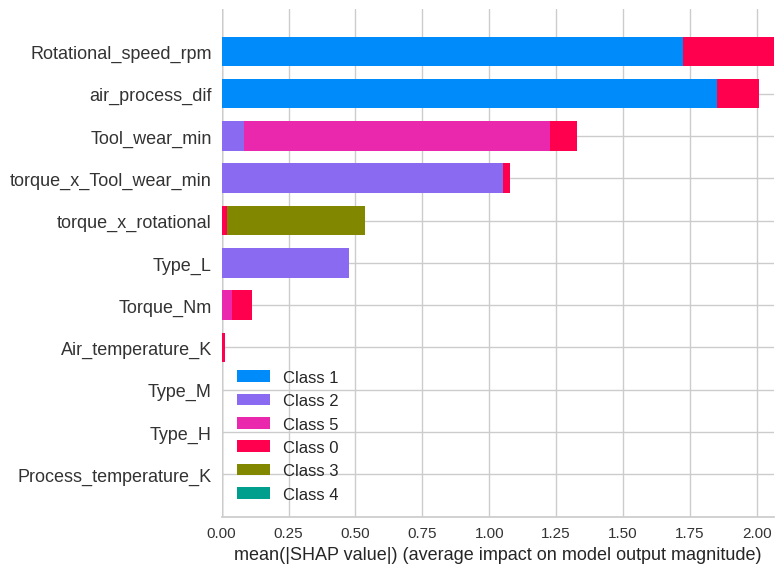

In [ ]:
shap.initjs()
shap.summary_plot(shap_values, transformed_test)

# tool and torque yes
# power failure yes 
# heat failure yes 
# class 5 tool wear yes 
# class 4 is not using anything which makes sense because its random

Text(33.22222222222222, 0.5, 'Actual Value')

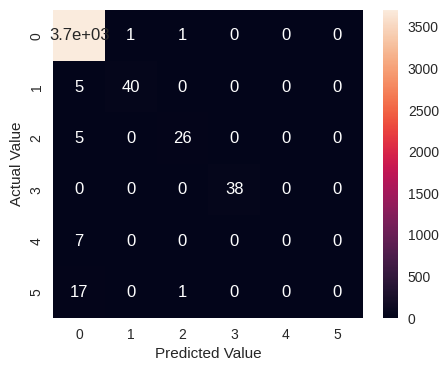

In [ ]:
cm = confusion_matrix(y_test_removed, p)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')

# SMOTEBoost Base Model with Outlier Treatment, Feature Scaling and Monotone Transformations

In [ ]:
# not sure how this works in collab 
# this is imported from a github repo i cloned into the same folder that this project is in
# https://github.com/dialnd/imbalanced-algorithms
from imbalanced_algorithms.smote import SMOTEBoost

ModuleNotFoundError: ignored

In [ ]:
smotecl = SMOTEBoost(random_state=0)

In [ ]:
model = smotecl.fit(transformed, y_train_removed, minority_target=[1,2,3,4,5])
p = model.predict(transformed_test)
f1_score(y_test_removed, p, average='macro')

#  SMOTENC Sampling and XGBoost Tuned Model with Outlier Treatment, Feature Scaling and Monotone Transformations

In [ ]:
oversampled_data = SMOTENC(sampling_strategy='not majority', categorical_features=[5,6,7])
X_over, y_over = oversampled_data.fit_resample(transformed,y_train_removed)

In [ ]:
param_grid = {
    "disable_default_eval_metric":[True],
    "learning_rate": [0, 0.01, 0.05, 0.1],
    "gamma": [1,5,10],
    "subsample": [1],
    "interaction_constraints": [[['Air_temperature_K', 'Process_temperature_K'], ['Rotational_speed_rpm', 'Torque_Nm'],
                                ['Torque_Nm','Tool_wear_min']]]
}

xgb_cl2 = xgb.XGBClassifier(objective="multi:softmax", num_class=6)
grid_cv =GridSearchCV(xgb_cl2, param_grid, n_jobs=-1, cv=3, scoring='f1_macro')
_ = grid_cv.fit(X_over, y_over)
print(f"best score: {grid_cv.best_score_}")
print(f"best parameters: {grid_cv.best_params_}")

best score: 0.9737610890630424
best parameters: {'disable_default_eval_metric': True, 'gamma': 1, 'interaction_constraints': [['Air_temperature_K', 'Process_temperature_K'], ['Rotational_speed_rpm', 'Torque_Nm'], ['Torque_Nm', 'Tool_wear_min']], 'learning_rate': 0.1, 'subsample': 1}


In [ ]:
final_cl = xgb.XGBClassifier(**grid_cv.best_params_, objective="multi:softmax", num_class=6)

In [ ]:
model_final = final_cl.fit(X_over, y_over)

In [ ]:
p = model_final.predict(transformed_test)

In [ ]:
print(f"Test: {f1_score(y_test_removed,p, average='macro')}")

Test: 0.6210823635811283


In [ ]:
print(classification_report(y_test_removed,p))

              precision    recall  f1-score   support

           0       0.99      0.91      0.95      3706
           1       0.83      1.00      0.91        45
           2       0.74      0.74      0.74        31
           3       1.00      1.00      1.00        38
           4       0.01      0.29      0.02         7
           5       0.06      0.50      0.11        18

    accuracy                           0.90      3845
   macro avg       0.61      0.74      0.62      3845
weighted avg       0.98      0.90      0.94      3845



Text(33.22222222222222, 0.5, 'Actual Value')

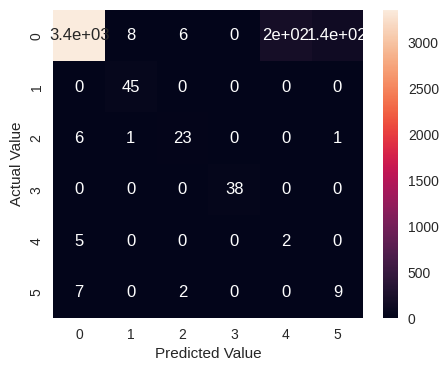

In [ ]:
cm = confusion_matrix(y_test_removed,p)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')

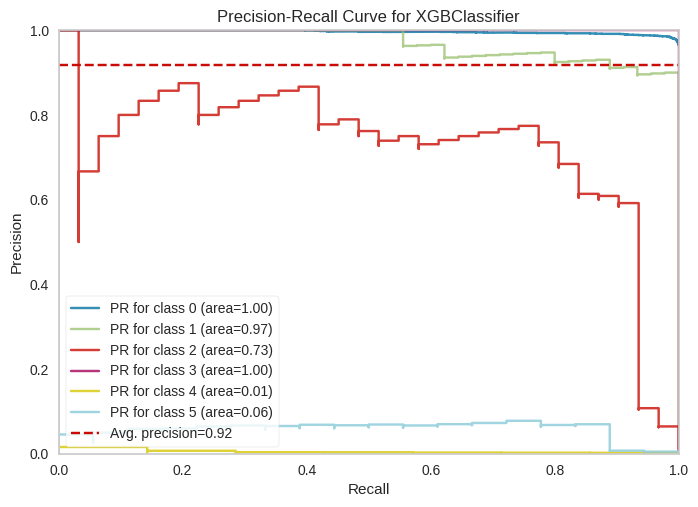

<Axes: title={'center': 'Precision-Recall Curve for XGBClassifier'}, xlabel='Recall', ylabel='Precision'>

In [ ]:
viz = PrecisionRecallCurve(model_final, per_class=True, num_class=6,classes=[0,1,2,3,4,5])
viz.fit(X_over, y_over)
viz.score(transformed_test, y_test_removed)
viz.show()

# SMOTENC Sampling and AdaBoost Base Model with Outlier Treatment, Feature Scaling and Monotone Transformations

In [ ]:
adacl = AdaBoostClassifier(random_state=0)

In [ ]:
adacl.fit(X_over, y_over)

AdaBoostClassifier(random_state=0)

In [ ]:
p2 = adacl.predict(transformed_test)

In [ ]:
print(classification_report(y_test_removed,p))

              precision    recall  f1-score   support

           0       0.99      0.91      0.95      3706
           1       0.83      1.00      0.91        45
           2       0.74      0.74      0.74        31
           3       1.00      1.00      1.00        38
           4       0.01      0.29      0.02         7
           5       0.06      0.50      0.11        18

    accuracy                           0.90      3845
   macro avg       0.61      0.74      0.62      3845
weighted avg       0.98      0.90      0.94      3845



Text(33.22222222222222, 0.5, 'Actual Value')

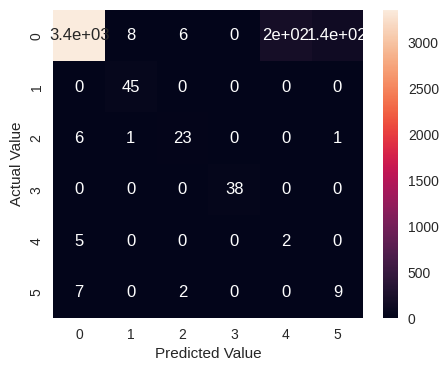

In [ ]:
cm = confusion_matrix(y_test_removed,p)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')

# ADASYN Sampling and XGBoost Base Model with Outlier Treatment, Feature Scaling and Monotone Transformations

In [ ]:
oversampled_data = ADASYN()
X_over_a, y_over_a = oversampled_data.fit_resample(transformed, y_train_removed)

In [ ]:
y_over_a.value_counts()

code
5       5574
4       5566
3       5565
1       5564
0       5562
2       5560
dtype: int64

In [ ]:
model = xgb.XGBClassifier(objective="multi:softmax", eval_metric='aucpr', num_class=6)

In [ ]:
model.fit(X_over_a, y_over_a)
p = model.predict(transformed_test)

In [ ]:
print(classification_report(y_test_removed, p))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3706
           1       0.95      0.89      0.92        45
           2       0.95      0.68      0.79        31
           3       0.95      1.00      0.97        38
           4       0.00      0.00      0.00         7
           5       0.04      0.06      0.05        18

    accuracy                           0.98      3845
   macro avg       0.65      0.60      0.62      3845
weighted avg       0.98      0.98      0.98      3845



Text(33.22222222222222, 0.5, 'Actual Value')

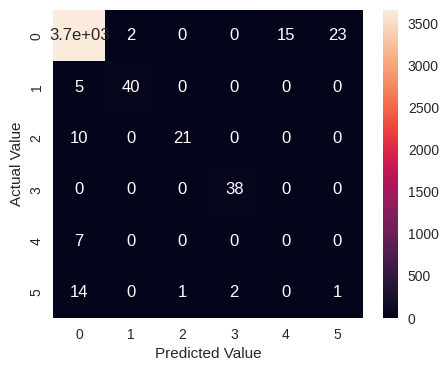

In [ ]:
cm = confusion_matrix(y_test_removed, p)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')

#  BorderlineSMOTE Sampling and XGBoost Base Model with Outlier Treatment, Feature Scaling and Monotone Transformations

In [ ]:
oversampled_data = BorderlineSMOTE(random_state=0)
X_over_b, y_over_b = oversampled_data.fit_resample(transformed, y_train_removed)


In [ ]:
y_over_b.value_counts()

code
0       5562
1       5562
2       5562
3       5562
5       5562
4         11
dtype: int64

In [ ]:
model = xgb.XGBClassifier(objective="multi:softmax", eval_metric='aucpr', num_class=6)

In [ ]:
model.fit(X_over_b, y_over_b)
p = model.predict(transformed_test)
p2 = model.predict(transformed)

In [ ]:
f1_score(y_train_removed,p2, average='macro')

1.0

In [ ]:
print(classification_report(y_test_removed,p))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3706
           1       0.95      0.89      0.92        45
           2       0.85      0.74      0.79        31
           3       0.95      1.00      0.97        38
           4       0.00      0.00      0.00         7
           5       0.03      0.06      0.04        18

    accuracy                           0.98      3845
   macro avg       0.63      0.61      0.62      3845
weighted avg       0.98      0.98      0.98      3845



Text(33.22222222222222, 0.5, 'Actual Value')

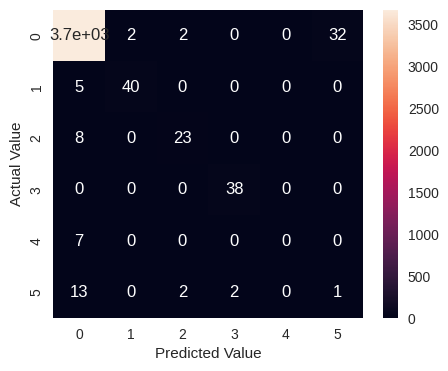

In [ ]:
cm = confusion_matrix(y_test_removed, p)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')

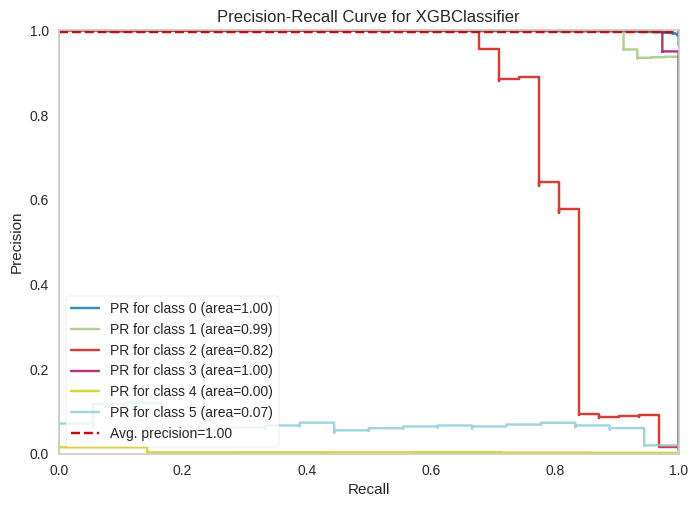

<Axes: title={'center': 'Precision-Recall Curve for XGBClassifier'}, xlabel='Recall', ylabel='Precision'>

In [ ]:
viz = PrecisionRecallCurve(model, per_class=True, num_class=6,classes=[0,1,2,3,4,5])
viz.fit(X_over_b, y_over_b)
viz.score(transformed_test, y_test_removed)
viz.show()


# RandomOverSampler Sampling and XGBoost Base Model with Outlier Treatment, Feature Scaling and Monotone Transformations

In [ ]:
oversampled_data = RandomOverSampler(random_state=0)
X_over_R, y_over_R = oversampled_data.fit_resample(transformed, y_train_removed)

In [ ]:
y_over_R.value_counts()

code
0       5562
1       5562
2       5562
3       5562
4       5562
5       5562
dtype: int64

In [ ]:
model = xgb.XGBClassifier(objective="multi:softmax", eval_metric='aucpr', num_class=6)
model.fit(X_over_R, y_over_R)
p = model.predict(transformed_test)
p2 = model.predict(transformed)

In [ ]:
f1_score(y_train_removed,p2,average='macro')

1.0

In [ ]:
print(classification_report(y_test_removed,p))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3706
           1       0.95      0.91      0.93        45
           2       0.90      0.84      0.87        31
           3       0.95      1.00      0.97        38
           4       1.00      0.14      0.25         7
           5       0.00      0.00      0.00        18

    accuracy                           0.99      3845
   macro avg       0.80      0.65      0.67      3845
weighted avg       0.99      0.99      0.99      3845



Text(33.22222222222222, 0.5, 'Actual Value')

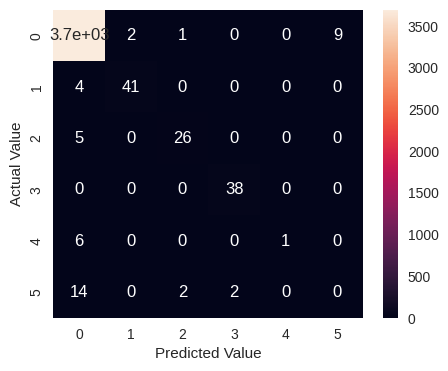

In [ ]:
cm = confusion_matrix(y_test_removed, p)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')

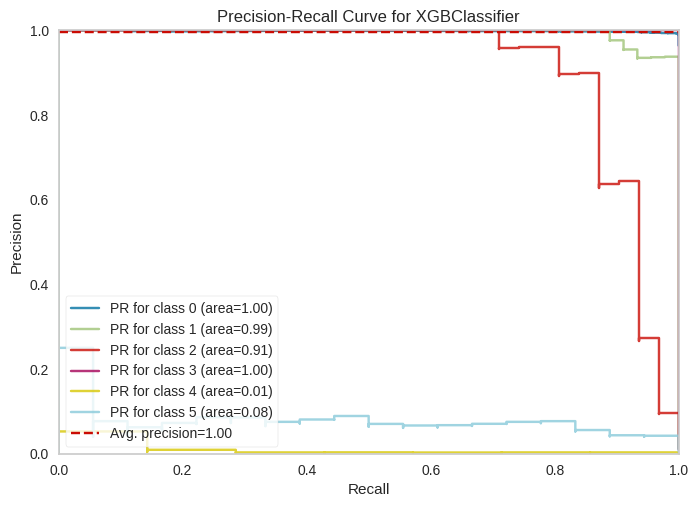

<Axes: title={'center': 'Precision-Recall Curve for XGBClassifier'}, xlabel='Recall', ylabel='Precision'>

In [ ]:
viz = PrecisionRecallCurve(model, per_class=True, num_class=6,classes=[0,1,2,3,4,5])
viz.fit(X_over_R, y_over_R)
viz.score(transformed_test, y_test_removed)
viz.show()


# Cluster Centroids Sampling and XGBoost Base Model with Outlier Treatment, Feature Scaling and Monotone Transformations

In [ ]:
cc = ClusterCentroids(random_state=0, sampling_strategy='majority')

In [ ]:
X_clust, y_clust = cc.fit_resample(transformed, y_train_removed)

ValueError: ignored

In [ ]:
y_clust.value_counts()

In [ ]:
model = xgb.XGBClassifier(objective="multi:softmax", eval_metric='aucpr',num_class=6)
model.fit(X_clust, y_clust)
p = model.predict(transformed_test)
p2 = model.predict(transformed)

In [ ]:
f1_score(y_train_removed,p2, average='macro')

In [ ]:
print(classification_report(y_test_removed,p))
# it's actually not bad, but class 0 is predicted terribly 

# Clustering 

In [ ]:
kmeans = KMeans(
init="random",
n_clusters=6,
n_init=10,
max_iter=300,
random_state=0
)

In [ ]:
transformed_concat = pd.concat([transformed.copy(), transformed_test.copy()])

In [ ]:
kmeans.fit(transformed_concat)

KMeans(init='random', n_clusters=6, n_init=10, random_state=0)

In [ ]:
transformed_concat['cluster'] = kmeans.labels_

In [ ]:
transformed_concat['code'] = pd.concat([y_train_removed.copy(), y_test_removed.copy()])

In [ ]:
def plot3d(x, y, z):
    fig = px.scatter_3d(transformed_concat, x=x, y=y, z=z,
              color='cluster', size='code', size_max=25, opacity=0.65, height=700, 
                    title="How clustering performs ")
    
    return fig

In [ ]:
ipywidgets.interact(plot3d, x=variables[:-1], 
                    y = variables[:-1],
                    z = variables[:-1])

interactive(children=(Dropdown(description='x', options=('Air_temperature_K', 'Process_temperature_K', 'Rotati…

<function __main__.plot3d(x, y, z)>